## Luv Surve - Task 3 Unsupervised Learning(Clustering)

### Importing all necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading the file

In [2]:
data = pd.read_csv('Iris.csv')

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#### Available columns

In [4]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

#### Data shape:

In [5]:
data.shape

(150, 6)

#### Data Info

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


### Preparing data to feed into the Kmeans model
#### Dropping the target value column

In [7]:
new_data = data.drop('Species',axis = 1).values

#### Training model with k values upto 10 to find the ideal no. of clusters

In [8]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i,init = 'k-means++',random_state = 42)
    kmeans.fit(new_data)
    wcss.append(kmeans.inertia_)


#### Using the data from above process to plot the Elbow graph

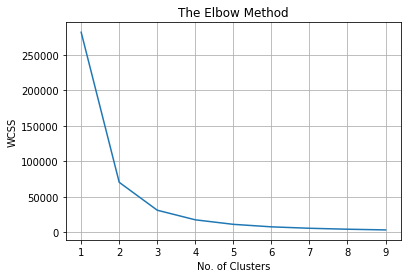

In [9]:
plt.plot(range(1,10),wcss)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

#### From the Graph the last value with change is 3

#### Training the model with k = 3 value

In [10]:
from sklearn.cluster import KMeans
wcss = []
kmeans = KMeans(n_clusters = 3,init = 'k-means++',random_state = 42)
kmeans.fit(new_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

### Predicting the ability of the model to differentiate the 3 species

In [11]:
y_kmeans = kmeans.fit_predict(new_data)

### Plotting a scatter plot for the 3 species

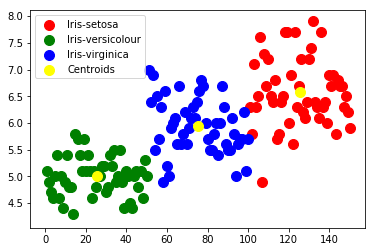

In [12]:
plt.scatter(new_data[y_kmeans == 0, 0], new_data[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(new_data[y_kmeans == 1, 0], new_data[y_kmeans == 1, 1], 
            s = 100, c = 'green', label = 'Iris-versicolour')
plt.scatter(new_data[y_kmeans == 2, 0], new_data[y_kmeans == 2, 1],
            s = 100, c = 'blue', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

### Using the dendrogram method to cross-check the no. of clusters


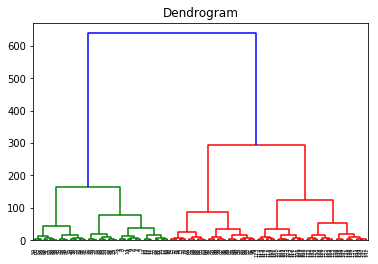

In [13]:
import scipy.cluster.hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(new_data,method='ward'))
plt.title('Dendrogram')
plt.show()

#### Again 3 is the optimum number of clusters found from the dendrogram.

### Using AgglomerativeClustering Model

In [14]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_hc = hc.fit_predict(new_data)

### Plotting a scatter plot for the 3 species

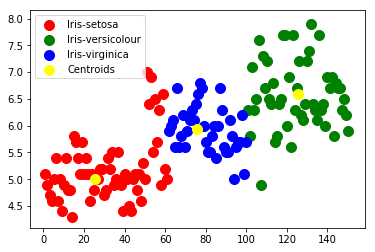

In [15]:
plt.scatter(new_data[y_hc == 0, 0], new_data[y_hc == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(new_data[y_hc == 1, 0], new_data[y_hc == 1, 1], 
            s = 100, c = 'green', label = 'Iris-versicolour')
plt.scatter(new_data[y_hc == 2, 0], new_data[y_hc == 2, 1],
            s = 100, c = 'blue', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()